## Pneumonia Classification

The goal is to build a classifier that predicts whether a patient has pneumonia based on their record. 

---

In [1]:
# Import libraries

import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset

pneumonia = pd.read_csv("~/Documents/GitHub/real-application/data/pneumonia.csv")
pneumonia.head()

,age,sex,adm,sbp,scl,agl,inf,her,mur,std,ste,flu,target
0,65,m,d,149,234,t,0,150,f,2.3,0,0,t
1,41,m,c,135,253,f,1,190,f,3.5,0,0,t
2,44,f,b,135,207,f,0,174,f,1.4,2,0,t
3,57,m,b,125,239,f,1,179,f,0.8,2,0,t
4,60,f,a,120,359,f,1,163,t,0.6,2,0,t


In [3]:
# Dataset information

pneumonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     299 non-null    int64  
 1   sex     299 non-null    object 
 2   adm     299 non-null    object 
 3   sbp     299 non-null    int64  
 4   scl     299 non-null    int64  
 5   agl     299 non-null    object 
 6   inf     299 non-null    int64  
 7   her     299 non-null    int64  
 8   mur     299 non-null    object 
 9   std     299 non-null    float64
 10  ste     299 non-null    int64  
 11  flu     299 non-null    int64  
 12  target  299 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 30.5+ KB


In [4]:
# Dataset summary 

pneumonia.describe()

,age,sbp,scl,inf,her,std,ste,flu
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,56.886288,133.969900,249.163880,0.528428,152.280936,1.039799,1.397993,0.695652
std,9.116718,17.596591,51.846281,0.526188,22.817220,1.161919,0.617526,0.981890
min,30.000000,96.000000,126.000000,0.000000,72.000000,0.000000,0.000000,0.000000
25%,50.000000,122.000000,214.000000,0.000000,137.500000,0.000000,1.000000,0.000000
50%,58.000000,132.000000,243.000000,1.000000,156.000000,0.800000,1.000000,0.000000
75%,63.000000,144.000000,277.500000,1.000000,168.000000,1.600000,2.000000,1.000000
max,77.000000,200.000000,565.000000,2.000000,204.000000,6.200000,2.000000,4.000000


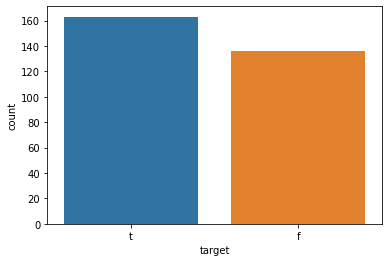

In [5]:
# Outcome vizualization

sns.countplot(x = 'target', data = pneumonia);

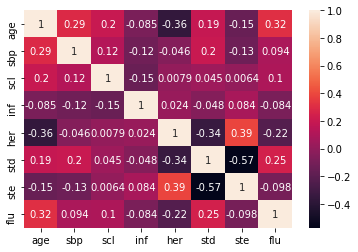

In [6]:
# Correlation plot

sns.heatmap(pneumonia.corr(), annot = True);

In [7]:
# Categorical indepedent variables 

X_cat = pneumonia[['sex', 'adm', 'agl', 'mur']]
X_cat.head(5)

,sex,adm,agl,mur
0,m,d,t,f
1,m,c,f,f
2,f,b,f,f
3,m,b,f,f
4,f,a,f,t


In [8]:
# Encoding categorical variables 

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [9]:
# Returning categorical variables to dataframe

X_cat = pd.DataFrame(X_cat)
X_cat.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
# Numerical indepedent variables 

X_num = pneumonia[['age', 'sbp', 'scl','inf','her', 'std','ste', 'flu']]
X_num.head(5)

,age,sbp,scl,inf,her,std,ste,flu
0,65,149,234,0,150,2.3,0,0
1,41,135,253,1,190,3.5,0,0
2,44,135,207,0,174,1.4,2,0
3,57,125,239,1,179,0.8,2,0
4,60,120,359,1,163,0.6,2,0


In [11]:
# Concatenation of categorical and numberical variables

X_all = pd.concat([X_cat, X_num], axis = 1)
X_all.head(5)

,0,1,2,3,4,5,6,7,8,9,age,sbp,scl,inf,her,std,ste,flu
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,65,149,234,0,150,2.3,0,0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,41,135,253,1,190,3.5,0,0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,44,135,207,0,174,1.4,2,0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,57,125,239,1,179,0.8,2,0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,60,120,359,1,163,0.6,2,0


In [12]:
# Scaling indepedent variables in new dataframe

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
print(X)
type(X)

[[0.         1.         0.         ... 0.37096774 0.         0.        ]
 [0.         1.         0.         ... 0.56451613 0.         0.        ]
 [1.         0.         0.         ... 0.22580645 1.         0.        ]
 ...
 [0.         1.         1.         ... 0.5483871  0.5        0.5       ]
 [0.         1.         1.         ... 0.19354839 0.5        0.25      ]
 [1.         0.         0.         ... 0.         0.5        0.25      ]]


numpy.ndarray

In [13]:
# Dependent variable 

y = pneumonia.iloc[:, 12].values
y

array(['t', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
       't', 't', 't', 't', 't', 't', 't', 'f', 'f', 'f', 'f', 'f', 'f',
       'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f

In [14]:
# Encoding dependent variable 

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [15]:
# Splitting the dataset into the training & test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
# Build the ANN model

classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(18, )))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
classifier.add(tf.keras.layers.Dropout(0.2))

classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               7600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 168,401
Trainable params: 168,401
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the ANN model

classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Train the ANN model

epochs_hist = classifier.fit(X_train, y_train, epochs = 100)

Train on 239 samples
Epoch 1/100
239/239 [==============================] - 1s 3ms/sample - loss: 0.6396 - accuracy: 0.6234
Epoch 2/100
239/239 [==============================] - 0s 295us/sample - loss: 0.5185 - accuracy: 0.7657
Epoch 3/100
239/239 [==============================] - 0s 297us/sample - loss: 0.4612 - accuracy: 0.7782
Epoch 4/100
239/239 [==============================] - 0s 272us/sample - loss: 0.4230 - accuracy: 0.7992
Epoch 5/100
239/239 [==============================] - 0s 277us/sample - loss: 0.3935 - accuracy: 0.8075
Epoch 6/100
239/239 [==============================] - 0s 265us/sample - loss: 0.3780 - accuracy: 0.8201
Epoch 7/100
239/239 [==============================] - 0s 280us/sample - loss: 0.3725 - accuracy: 0.8285
Epoch 8/100
239/239 [==============================] - 0s 267us/sample - loss: 0.3617 - accuracy: 0.8326
Epoch 9/100
239/239 [==============================] - 0s 262us/sample - loss: 0.3624 - accuracy: 0.8326
Epoch 10/100
239/239 [==============

In [19]:
# Predict respone on test dataset

y_pred = classifier.predict(X_test)
y_pred

array([[2.2116062e-01],
       [8.2858837e-01],
       [1.7509639e-02],
       [9.9921250e-01],
       [9.9849904e-01],
       [7.1265042e-02],
       [9.9807787e-01],
       [8.6582404e-01],
       [1.7813510e-01],
       [5.4925507e-01],
       [9.9995208e-01],
       [9.9998564e-01],
       [9.9998331e-01],
       [9.0678120e-01],
       [7.1488553e-01],
       [7.6148975e-01],
       [1.2669650e-01],
       [9.9987149e-01],
       [1.2630224e-04],
       [7.9641867e-01],
       [9.9547726e-01],
       [9.9116719e-01],
       [1.1026859e-06],
       [9.9999857e-01],
       [9.9537563e-01],
       [6.1873019e-01],
       [9.9990863e-01],
       [9.9858832e-01],
       [9.9995750e-01],
       [9.9978459e-01],
       [9.9999982e-01],
       [7.4058771e-05],
       [8.2938087e-01],
       [9.9999714e-01],
       [9.9925041e-01],
       [9.9998498e-01],
       [9.9527109e-01],
       [1.1920929e-07],
       [9.5665288e-01],
       [9.9908966e-01],
       [7.3820353e-05],
       [9.998680

In [20]:
# If prediction is greater than .5 is true 

y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True]])

In [21]:
# Evalute the ANN model

epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

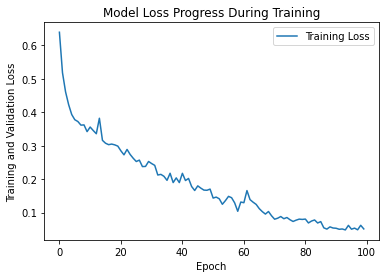

In [22]:
# Plot loss fuction

plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

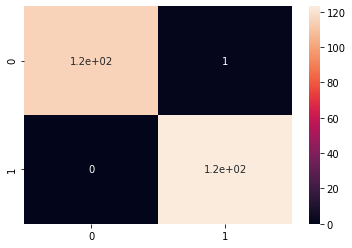

In [23]:
# Training set performance

from sklearn.metrics import confusion_matrix

y_train_pred = classifier.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True);

In [24]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00       115
        True       1.00      0.99      1.00       124

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



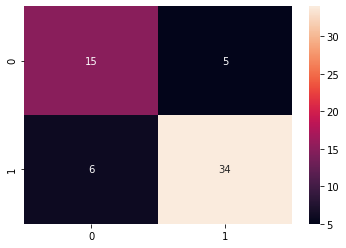

In [25]:
# Testing set rerformance

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [26]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73        20
           1       0.87      0.85      0.86        40

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60

